In [0]:
from google.colab import drive
drive.mount('/content/drive/')

# Machine Learning in Spark
#### Objective: Build a classification algorithm using Spark ML
#### As part of this activity,
#### 1. Read data, understand data using exploratory data analysis.
#### 2. Do necessary pre-processing and build machine learning classification algorithm using the libraries available in SparkML. 

### Data Representation
- **Pandas** - DataFrames represented on a single machine as Python data structures
- **RDDs** - Spark’s foundational structure Resilient Distributed Dataset is represented as a reference to partitioned data without types
- **DataFrames** - Spark’s strongly typed optimized distributed collection of rows

**All ML Algorithms need to represent data as vectors (array of Double values) in order to train machine learning algorithms**

## ML Pipelines
ML Pipelines provide a uniform set of high-level APIs built on top of DataFrames that help users create and tune practical machine learning pipelines and this concept is mostly inspired by the scikit-learn project.



### Single vs Distributed Machine Learning

#### Single Machine Learning
- In a single machine algorithm such as scikit-learn, the data isloaded into the memory of a single machine (usually as Pandas or
NumPy vectors)
- The single machine algorithm iterates (loops) over the data in memory and using a single thread (sometimes multicore) takes a
"guess" at the equation
- The error is calculated and if the error from the previous iteration is less than the tolerance or the iterations are >= max iterations then STOP<br>

#### Distributed Machine Learning
- In Distributed Machine Learning like Spark MLlib, the data is represented as an RDD or a DataFrame typically in distributed file storage such as S3, Blob Store or HDFS
- As a best practice, you should cache the data in memory across the nodes so that multiple iterations don’t have to query the disk each time
- The calculation of the gradients is distributed across all the nodes using Spark's distributed compute engine (similar to MapReduce)
- After each iteration, the results return to the driver and iterations continue until eithermax_iter or tol is reached


## Setup

#### Configure Spark Environment
Configure environment variables, Make sure you provide the correct Spark installation path/location.

In [0]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-2.3.1/spark-2.3.1-bin-hadoop2.7.tgz
!tar xf spark-2.3.1-bin-hadoop2.7.tgz

!pip install -q findspark
!pip install -q plotly==4.4.1

In [0]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.3.1-bin-hadoop2.7"

### Starting the Spark Session
#### Create and Initialize Spark Driver
Creating a spark app that will run locally and will use as many threads as there are cores using local[*] :

In [0]:
import findspark
findspark.init()

from pyspark.sql import SparkSession

spark = ******

#### Verify Spark Driver -  Spark Session

In [0]:
## Verify Spark Session
spark

#### Load Dependent Libraries

#### Spark libraries

In [0]:
from pyspark.sql.types import *
from pyspark.sql.functions import *

In [0]:
import numpy as np
import pandas as pd
import warnings

#### Problem Statement
The dataset is from a bank, data related to direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, to access if the product (bank term deposit) would be (or not) subscribed. The data and attribute description are in the folder.

#### Dataset Description
The dataset has the following attributes:
<br>1 - age (numeric)
<br>2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student", "blue-collar","self-employed","retired","technician","services")
<br>3 - marital_status : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
<br>4 - education (categorical: "unknown","secondary","primary","tertiary")
<br>5 - default: has credit in default? (binary: "yes","no")
<br>6 - balance: average yearly balance, in euros (numeric)
<br>7 - housing: has housing loan? (binary: "yes","no")
<br>8 - loan: has personal loan? (binary: "yes","no")
<br>9 - contact: contact communication type (categorical: "unknown","telephone","cellular")
<br>10 - day: last contact day of the month (numeric)
<br>11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
<br>12 - duration: last contact duration, in seconds (numeric)
<br>13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
<br>14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
<br>15 - previous: number of contacts performed before this campaign and for this client (numeric)
<br>16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")
<br>**17 - opened_new_td_act_no_yes - has the client subscribed to a term deposit? (binary: "yes","no")**

<html>
<font color="blue">
<br>
The idea is we have set of information about a person whether its their age the job they have the marital status whether they have loan with the bank or not etc. we're trying to decide here is whether this person open a new deposit account with this bank.
</br><br><br>
So the theory here is that if I can better target the right customers with the right offer at right time they'll convert over to actually open a deposit account with the bank so that I don't have to reach out whole population and waste a lot of money with ads or mailer or what ever have you but target only the perspective customers.
</br></font>
</html>

#### Define the schema for the dataset and use this to create the DataFrame

In [0]:
## Define Schema
bankDataSchema = StructType([
         StructField("age", IntegerType(), True),
         StructField("job", StringType(), True),
         StructField("marital_status", StringType(), True),
         StructField("education", StringType(), True),
         StructField("default", StringType(), True),
         StructField("balance", DoubleType(), True),
         StructField("housing", StringType(), True),
         StructField("loan", StringType(), True),        
         StructField("contact", StringType(), True),
         StructField("day", IntegerType(), True),
         StructField("month", StringType(), True),
         StructField("duration", DoubleType(), True),
         StructField("campaign", DoubleType(), True),
         StructField("pdays", DoubleType(), True),
         StructField("previous", DoubleType(), True),
         StructField("poutcome", StringType(), True),
         StructField("opened_new_td_act_no_yes", StringType(), True)])

#### Using the above schema read data and create DataFrame

In [0]:
# Reading and create from local files
bankDF = ****

# Reading and create from HDFS
# bankDF = spark.read.format("csv")\
#         .option("header", "false")\
#         .option("inferSchema", "true")\
#         .load("/user/user6/<path>/bank_data.csv", schema = bankDataSchema)
        
# bankDF = spark.read.format("csv")\
#         .option("header", "false")\
#         .option("inferSchema", "true")\
#         .load("hdfs:///user/user6/<path>/bank_data.csv", schema = bankDataSchema)

#### Verify Schema

root
 |-- age: integer (nullable = true)
 |-- job: string (nullable = true)
 |-- marital_status: string (nullable = true)
 |-- education: string (nullable = true)
 |-- default: string (nullable = true)
 |-- balance: double (nullable = true)
 |-- housing: string (nullable = true)
 |-- loan: string (nullable = true)
 |-- contact: string (nullable = true)
 |-- day: integer (nullable = true)
 |-- month: string (nullable = true)
 |-- duration: double (nullable = true)
 |-- campaign: double (nullable = true)
 |-- pdays: double (nullable = true)
 |-- previous: double (nullable = true)
 |-- poutcome: string (nullable = true)
 |-- opened_new_td_act_no_yes: string (nullable = true)



#### Check datatype of each column/field/attribute/feature

[('age', 'int'),
 ('job', 'string'),
 ('marital_status', 'string'),
 ('education', 'string'),
 ('default', 'string'),
 ('balance', 'double'),
 ('housing', 'string'),
 ('loan', 'string'),
 ('contact', 'string'),
 ('day', 'int'),
 ('month', 'string'),
 ('duration', 'double'),
 ('campaign', 'double'),
 ('pdays', 'double'),
 ('previous', 'double'),
 ('poutcome', 'string'),
 ('opened_new_td_act_no_yes', 'string')]

#### Verify first few records

In [0]:
## To Show first n observations
## Use head operation to see first n observations (say, 10 observations). 
## Head operation in PySpark is similar to head operation in Pandas.


[Row(age=30, job=u'unemployed', marital_status=u'married', education=u'primary', default=u'no', balance=1787.0, housing=u'no', loan=u'no', contact=u'cellular', day=19, month=u'oct', duration=79.0, campaign=1.0, pdays=-1.0, previous=0.0, poutcome=u'unknown', opened_new_td_act_no_yes=u'no'),
 Row(age=33, job=u'services', marital_status=u'married', education=u'secondary', default=u'no', balance=4789.0, housing=u'yes', loan=u'yes', contact=u'cellular', day=11, month=u'may', duration=220.0, campaign=1.0, pdays=339.0, previous=4.0, poutcome=u'failure', opened_new_td_act_no_yes=u'no'),
 Row(age=35, job=u'management', marital_status=u'single', education=u'tertiary', default=u'no', balance=1350.0, housing=u'yes', loan=u'no', contact=u'cellular', day=16, month=u'apr', duration=185.0, campaign=1.0, pdays=330.0, previous=1.0, poutcome=u'failure', opened_new_td_act_no_yes=u'no'),
 Row(age=30, job=u'management', marital_status=u'married', education=u'tertiary', default=u'no', balance=1476.0, housing

In [0]:
## Above results are comprised of row like format. 
## To see the result in more interactive manner (rows under the columns), Use the show operation. 
## Show operation on train and take first 5 rows of it. 


+---+-----------+--------------+---------+-------+-------+-------+----+--------+---+-----+--------+--------+-----+--------+--------+------------------------+
|age|        job|marital_status|education|default|balance|housing|loan| contact|day|month|duration|campaign|pdays|previous|poutcome|opened_new_td_act_no_yes|
+---+-----------+--------------+---------+-------+-------+-------+----+--------+---+-----+--------+--------+-----+--------+--------+------------------------+
| 30| unemployed|       married|  primary|     no| 1787.0|     no|  no|cellular| 19|  oct|    79.0|     1.0| -1.0|     0.0| unknown|                      no|
| 33|   services|       married|secondary|     no| 4789.0|    yes| yes|cellular| 11|  may|   220.0|     1.0|339.0|     4.0| failure|                      no|
| 35| management|        single| tertiary|     no| 1350.0|    yes|  no|cellular| 16|  apr|   185.0|     1.0|330.0|     1.0| failure|                      no|
| 30| management|       married| tertiary|     no| 1

#### Verify the total rows and columns

In [0]:
## To Count the number of rows in DataFrame
print('Total records count is {}'.format(bankDF.count()))
## Columns count and column names
print("Total Columns count is {}".format(len(bankDF.columns)))
print("\n\nColumns are: {}".format(bankDF.columns))

Total records count is 4521
Total Columns count is 17


Columns are: ['age', 'job', 'marital_status', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'opened_new_td_act_no_yes']


#### Verify the Summary Statistics

In [0]:
## To get the summary statistics (mean, standard deviance, min ,max , count) 
#of columns in a DataFrame


+-------+------------------+-------+--------------+---------+-------+------------------+-------+----+--------+------------------+-----+------------------+------------------+------------------+------------------+--------+------------------------+
|summary|               age|    job|marital_status|education|default|           balance|housing|loan| contact|               day|month|          duration|          campaign|             pdays|          previous|poutcome|opened_new_td_act_no_yes|
+-------+------------------+-------+--------------+---------+-------+------------------+-------+----+--------+------------------+-----+------------------+------------------+------------------+------------------+--------+------------------------+
|  count|              4521|   4521|          4521|     4521|   4521|              4521|   4521|4521|    4521|              4521| 4521|              4521|              4521|              4521|              4521|    4521|                    4521|
|   mean| 41.170

In [0]:
## Verify summary stats for few fields
bankDF.describe().select('summary', 'age', 'loan', 'balance', 'pdays').show()

+-------+------------------+----+------------------+------------------+
|summary|               age|loan|           balance|             pdays|
+-------+------------------+----+------------------+------------------+
|  count|              4521|4521|              4521|              4521|
|   mean| 41.17009511170095|null|1422.6578190665782|39.766644547666445|
| stddev|10.576210958711263|null|3009.6381424673395|100.12112444301656|
|    min|                19|  no|           -3313.0|              -1.0|
|    max|                87| yes|           71188.0|             871.0|
+-------+------------------+----+------------------+------------------+



#### Distinct values count in each column

In [0]:
## Find the Distinct values count in each column
bankDF.agg(*(countDistinct(col(c)).alias(c) for c in bankDF.columns)).show()

+---+---+--------------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+------------------------+
|age|job|marital_status|education|default|balance|housing|loan|contact|day|month|duration|campaign|pdays|previous|poutcome|opened_new_td_act_no_yes|
+---+---+--------------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+------------------------+
| 67| 12|             3|        4|      2|   2353|      2|   2|      3| 31|   12|     875|      32|  292|      24|       4|                       2|
+---+---+--------------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+------------------------+



#### Maximum values in each column

In [0]:
## Find maximum value in each column
bankDF.agg(*(max(col(c)).alias(c) for c in bankDF.columns)).show()

+---+-------+--------------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+------------------------+
|age|    job|marital_status|education|default|balance|housing|loan|contact|day|month|duration|campaign|pdays|previous|poutcome|opened_new_td_act_no_yes|
+---+-------+--------------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+------------------------+
| 87|unknown|        single|  unknown|    yes|71188.0|    yes| yes|unknown| 31|  sep|  3025.0|    50.0|871.0|    25.0| unknown|                     yes|
+---+-------+--------------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+------------------------+



#### Minimum values in each column

In [0]:
## Find maximum value in each column


+---+------+--------------+---------+-------+-------+-------+----+--------+---+-----+--------+--------+-----+--------+--------+------------------------+
|age|   job|marital_status|education|default|balance|housing|loan| contact|day|month|duration|campaign|pdays|previous|poutcome|opened_new_td_act_no_yes|
+---+------+--------------+---------+-------+-------+-------+----+--------+---+-----+--------+--------+-----+--------+--------+------------------------+
| 19|admin.|      divorced|  primary|     no|-3313.0|     no|  no|cellular|  1|  apr|     4.0|     1.0| -1.0|     0.0| failure|                      no|
+---+------+--------------+---------+-------+-------+-------+----+--------+---+-----+--------+--------+-----+--------+--------+------------------------+



#### Observation:
The minimum value in the balance column is negative
<br>Verify how many such negative values exists in the balance column

In [0]:
print("Total count of negative values in balance column are: {}".
      format(bankDF.where(bankDF.balance < 0).count()))

Total count of negative values in balance column are: 366


### Data Pre-Processing

#### Replace the negative balances with the ZEROES

In [0]:
## Replace negative balances with zeroes
from pyspark.sql.functions import when
bankDF = bankDF.withColumn('balance', when(bankDF.balance > 0, 
                                           bankDF.balance).otherwise(0))
zeroBalance = bankDF.where(bankDF.balance < 0)
zeroBalance.count()

0

In [0]:
bankDF.columns

['age',
 'job',
 'marital_status',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'opened_new_td_act_no_yes']

#### Define a table/view to run sql queries on the dataframe

In [0]:
## Create view/table


#### Verify the target distribution

In [0]:
## Multiple ways of referring a column in a dataframe
resultDF = spark.sql("""
SELECT opened_new_td_act_no_yes, COUNT(*) AS Count
FROM bankDFTable
GROUP BY opened_new_td_act_no_yes
""")

resultDF.show()

+------------------------+-----+
|opened_new_td_act_no_yes|Count|
+------------------------+-----+
|                      no| 4000|
|                     yes|  521|
+------------------------+-----+



In [0]:
import plotly.graph_objects as go

pdDF = resultDF.toPandas()
data = [
    go.Bar(
        x=pdDF['opened_new_td_act_no_yes'], # assign x as 
        #the dataframe column 'x'
        y=pdDF['Count']
    )
]
layout = go.Layout(title='Term Deposit Opted Yes/No Counts',)
fig = go.Figure(data=data, layout=layout)
fig

#### Pair wise frequency between Target (opened_new_td_act_no_yes) and loan columns

In [0]:
resultDF = bankDF.crosstab("opened_new_td_act_no_yes", "loan")
resultDF.show()

+-----------------------------+----+---+
|opened_new_td_act_no_yes_loan|  no|yes|
+-----------------------------+----+---+
|                          yes| 478| 43|
|                           no|3352|648|
+-----------------------------+----+---+



+----------------------------------+-------+---------+--------+-------+
|opened_new_td_act_no_yes_education|primary|secondary|tertiary|unknown|
+----------------------------------+-------+---------+--------+-------+
|                                no|    614|     2061|    1157|    168|
|                               yes|     64|      245|     193|     19|
+----------------------------------+-------+---------+--------+-------+



In [0]:
pdDF = resultDF.toPandas()

In [0]:
pdDF.columns

Index([u'opened_new_td_act_no_yes_loan', u'no', u'yes'], dtype='object')

In [0]:
pdDF = resultDF.toPandas()
pdDF.columns = ['opened_new_td_act_no_yes', 'No_Existing_Loans', 'Existing_Loan']
trace1 = go.Bar(
    x=['Opted for TD', 'Not Opted for TD'],
    y=pdDF['No_Existing_Loans'],
    name='No Existing Loans'
)

trace2 = go.Bar(
    x=['Opted for TD', 'Not Opted for TD'],
    y=pdDF['Existing_Loan'],
    name='Existing Loans'
)

data = [trace1, trace2]
layout = go.Layout(
    title='Term Deposit Accounts vs Existing Loan Counts',
    barmode='group'
)

fig = go.Figure(data=data, layout=layout)
fig

#### Term Deposit Opted Counts for different job categories

In [0]:
resultDF = spark.sql("""
SELECT 
    job,
    COUNT(*) AS term_deposit_yes_cnt
    FROM bankDFTable 
    WHERE opened_new_td_act_no_yes = "yes"
    GROUP BY job
""")

In [0]:
pdDF = resultDF.toPandas()
data = [
    go.Bar(
        x=pdDF['job'], # assign x as the dataframe column 'x'
        y=pdDF['term_deposit_yes_cnt']
    )
]
layout = go.Layout(title='Term Deposit Opted Counts in each Job Category',)
fig = go.Figure(data=data, layout=layout)
fig

#### Term Deposit Not-Opted Counts for different job categories

In [0]:
resultDF = spark.sql(""" **** """)

In [0]:
pdDF = resultDF.toPandas()
data = [
    go.Bar(
        x=pdDF['job'], # assign x as the dataframe column 'x'
        y=pdDF['term_deposit_no_cnt']
    )
]
layout = go.Layout(title='Term Deposit Count in each Job Category',)
fig = go.Figure(data=data, layout=layout)
fig

#### Term Deposits Counts for different education levels

In [0]:
resultDF = bankDF.filter(expr("opened_new_td_act_no_yes = 'yes'")).groupBy("education").count()

In [0]:
resultDF.show()

+---------+-----+
|education|count|
+---------+-----+
|  unknown|   19|
| tertiary|  193|
|secondary|  245|
|  primary|   64|
+---------+-----+



In [0]:
pdDF = resultDF.toPandas()
data = [
    go.Bar(
        x=pdDF['education'], # assign x as the dataframe column 'x'
        y=pdDF['count']
    )
]
layout = go.Layout(title='Term Deposit Opted Count in each Education Level',)
fig = go.Figure(data=data, layout=layout)
fig

In [0]:
resultDF = bankDF.filter(expr("")).groupBy("education").count()

In [0]:
pdDF = resultDF.toPandas()
data = [
    go.Bar(
        x=pdDF['education'], # assign x as the dataframe column 'x'
        y=pdDF['count']
    )
]
layout = go.Layout(title='Term Deposit Not-Opted Count in each Education Level',)
fig = go.Figure(data=data, layout=layout)
fig

#### Pair wise frequency between Target (opened_new_td_act_no_yes) and marital_status columns

In [0]:
resultDF = ****

In [0]:
resultDF.show()

+---------------------------------------+--------+-------+------+
|opened_new_td_act_no_yes_marital_status|divorced|married|single|
+---------------------------------------+--------+-------+------+
|                                    yes|      77|    277|   167|
|                                     no|     451|   2520|  1029|
+---------------------------------------+--------+-------+------+



In [0]:
resultDF = spark.sql("""
SELECT opened_new_td_act_no_yes,
    SUM(CASE WHEN marital_status = 'divorced' THEN 1 ELSE 0 END) divorced_Count,
    SUM(CASE WHEN marital_status = 'married' THEN 1 ELSE 0 END) married_Count,
    SUM(CASE WHEN marital_status = 'single' THEN 1 ELSE 0 END) single_Count
from bankDFTable
GROUP BY opened_new_td_act_no_yes
""")

In [0]:
resultDF.show()

+------------------------+--------------+-------------+------------+
|opened_new_td_act_no_yes|divorced_Count|married_Count|single_Count|
+------------------------+--------------+-------------+------------+
|                      no|           451|         2520|        1029|
|                     yes|            77|          277|         167|
+------------------------+--------------+-------------+------------+



In [0]:
pdDF = resultDF.toPandas()
trace1 = go.Bar(
    x=pdDF['opened_new_td_act_no_yes'],
    y=pdDF['divorced_Count'],
    name='Divorced Count'
)

trace2 = go.Bar(
    x=pdDF['opened_new_td_act_no_yes'],
    y=pdDF['married_Count'],
    name='Married Count'
)

trace3 = go.Bar(
    x=pdDF['opened_new_td_act_no_yes'],
    y=pdDF['single_Count'],
    name='Single Count'
)

data = [trace1, trace2, trace3]
layout = go.Layout(
    title='term depoisit opted/not-opted vs marital_status Counts',
    barmode='group'
)

fig = go.Figure(data=data, layout=layout)
fig

#### Pair wise frequency between Target (opened_new_td_act_no_yes) and default columns

In [0]:
resultDF = bankDF.crosstab('default', 'opened_new_td_act_no_yes')
resultDF.show()

+--------------------------------+----+---+
|default_opened_new_td_act_no_yes|  no|yes|
+--------------------------------+----+---+
|                             yes|  67|  9|
|                              no|3933|512|
+--------------------------------+----+---+



In [0]:
pdDF = resultDF.toPandas()
trace1 = go.Bar(
    x=['Defaulted_Yes', 'Defaulted_No'],
    y=pdDF['no'],
    name='Not Opted'
)

trace2 = go.Bar(
    x=['Defaulted_Yes', 'Defaulted_No'],
    y=pdDF['yes'],
    name='Opted'
)

data = [trace1, trace2]
layout = go.Layout(
    title='Default vs term deposit Counts',
    barmode='group'
)

fig = go.Figure(data=data, layout=layout)
fig

#### Convert Spark DataFrame into Pandas DataFrame

In [0]:
bankDF_pd = bankDF.toPandas()
bankDF_pd.head()

,age,job,marital_status,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,opened_new_td_act_no_yes
0,30,unemployed,married,primary,no,1787.0,no,no,cellular,19,oct,79.0,1.0,-1.0,0.0,unknown,no
1,33,services,married,secondary,no,4789.0,yes,yes,cellular,11,may,220.0,1.0,339.0,4.0,failure,no
2,35,management,single,tertiary,no,1350.0,yes,no,cellular,16,apr,185.0,1.0,330.0,1.0,failure,no
3,30,management,married,tertiary,no,1476.0,yes,yes,unknown,3,jun,199.0,4.0,-1.0,0.0,unknown,no
4,59,blue-collar,married,secondary,no,0.0,yes,no,unknown,5,may,226.0,1.0,-1.0,0.0,unknown,no


#### Derive Correlations for the numeric columns

In [0]:
correlations = bankDF_pd.corr()
correlations

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.084202,-0.017853,-0.002367,-0.005148,-0.008894,-0.003511
balance,0.084202,1.000000,-0.007595,-0.015195,-0.010840,0.008616,0.026031
day,-0.017853,-0.007595,1.000000,-0.024629,0.160706,-0.094352,-0.059114
duration,-0.002367,-0.015195,-0.024629,1.000000,-0.068382,0.010380,0.018080
campaign,-0.005148,-0.010840,0.160706,-0.068382,1.000000,-0.093137,-0.067833
pdays,-0.008894,0.008616,-0.094352,0.010380,-0.093137,1.000000,0.577562
previous,-0.003511,0.026031,-0.059114,0.018080,-0.067833,0.577562,1.000000


In [0]:
trace = go.Heatmap(z=[correlations['age'], correlations['balance'],correlations['day'],correlations['duration'],
                      correlations['campaign'],correlations['pdays'],correlations['previous']],
                   x=['age','balance','day','duration','campaign','pdays','previous'],
                   y=['age','balance','day','duration','campaign','pdays','previous'])
data=[trace]
layout = go.Layout(title='Heat Map',)

fig = go.Figure(data=data, layout=layout)
fig

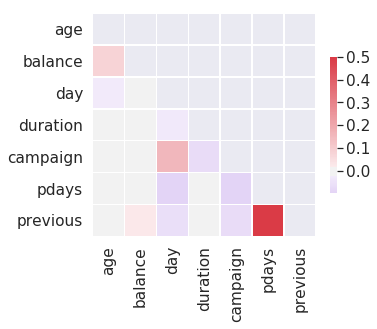

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

# Generate a mask for the upper triangle
mask = np.zeros_like(correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(5,5))
    
# Generate a custom diverging colormap
cmap = sns.diverging_palette(1000, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlations, mask=mask, cmap=cmap, vmax=.5, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

#### Stratified Sampling
10% from 0 class
<br> 90% from 1 class

In [0]:
sample_data = bankDF.sampleBy("opened_new_td_act_no_yes", 
                              fractions={'no': 0.1, 'yes': 0.9}, seed=12345)
print('Total records are: ', sample_data.count())
sample_data.show(4)

('Total records are: ', 847)
+---+----------+--------------+---------+-------+-------+-------+----+---------+---+-----+--------+--------+-----+--------+--------+------------------------+
|age|       job|marital_status|education|default|balance|housing|loan|  contact|day|month|duration|campaign|pdays|previous|poutcome|opened_new_td_act_no_yes|
+---+----------+--------------+---------+-------+-------+-------+----+---------+---+-----+--------+--------+-----+--------+--------+------------------------+
| 43|    admin.|       married|secondary|     no|  264.0|    yes|  no| cellular| 17|  apr|   113.0|     2.0| -1.0|     0.0| unknown|                      no|
| 20|   student|        single|secondary|     no|  502.0|     no|  no| cellular| 30|  apr|   261.0|     1.0| -1.0|     0.0| unknown|                     yes|
| 68|   retired|      divorced|secondary|     no| 4189.0|     no|  no|telephone| 14|  jul|   897.0|     2.0| -1.0|     0.0| unknown|                     yes|
| 32|management|       

In [0]:
sample_data.groupBy("opened_new_td_act_no_yes").count().orderBy("opened_new_td_act_no_yes").show()

+------------------------+-----+
|opened_new_td_act_no_yes|count|
+------------------------+-----+
|                      no|  375|
|                     yes|  472|
+------------------------+-----+



#### Verify for Null Values

In [0]:
bankDF.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) 
               for c in bankDF.columns]).show()

+---+---+--------------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+------------------------+
|age|job|marital_status|education|default|balance|housing|loan|contact|day|month|duration|campaign|pdays|previous|poutcome|opened_new_td_act_no_yes|
+---+---+--------------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+------------------------+
|  0|  0|             0|        0|      0|      0|      0|   0|      0|  0|    0|       0|       0|    0|       0|       0|                       0|
+---+---+--------------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+------------------------+



#### Remove Null values - if any

In [0]:
data_df = bankDF.na.drop( how = 'any' )
print('Before Dropping Null Values', bankDF.count())
print('After Dropping Null Values', data_df.count())

('Before Dropping Null Values', 4521)
('After Dropping Null Values', 4521)


#### Split the data into training and test sets (30% held out for testing)

In [0]:
(trainingData, testData) = bankDF.randomSplit([0.7, 0.3])

In [0]:
trainingData.show(4)

+---+-------+--------------+---------+-------+-------+-------+----+---------+---+-----+--------+--------+-----+--------+--------+------------------------+
|age|    job|marital_status|education|default|balance|housing|loan|  contact|day|month|duration|campaign|pdays|previous|poutcome|opened_new_td_act_no_yes|
+---+-------+--------------+---------+-------+-------+-------+----+---------+---+-----+--------+--------+-----+--------+--------+------------------------+
| 19|student|        single|  primary|     no|  103.0|     no|  no| cellular| 10|  jul|   104.0|     2.0| -1.0|     0.0| unknown|                     yes|
| 19|student|        single|secondary|     no|  302.0|     no|  no| cellular| 16|  jul|   205.0|     1.0| -1.0|     0.0| unknown|                     yes|
| 20|student|        single|secondary|     no|  291.0|     no|  no|telephone| 11|  may|   172.0|     5.0|371.0|     5.0| failure|                      no|
| 20|student|        single|secondary|     no|  502.0|     no|  no| ce

In [0]:
testData.show(4)

+---+--------+--------------+---------+-------+-------+-------+----+--------+---+-----+--------+--------+-----+--------+--------+------------------------+
|age|     job|marital_status|education|default|balance|housing|loan| contact|day|month|duration|campaign|pdays|previous|poutcome|opened_new_td_act_no_yes|
+---+--------+--------------+---------+-------+-------+-------+----+--------+---+-----+--------+--------+-----+--------+--------+------------------------+
| 19| student|        single|  unknown|     no|    0.0|     no|  no|cellular| 11|  feb|   123.0|     3.0| -1.0|     0.0| unknown|                      no|
| 19| student|        single|  unknown|     no| 1169.0|     no|  no|cellular|  6|  feb|   463.0|    18.0| -1.0|     0.0| unknown|                      no|
| 21|services|        single|secondary|     no| 1903.0|    yes|  no| unknown| 29|  may|   107.0|     2.0| -1.0|     0.0| unknown|                      no|
| 21| student|        single|secondary|     no| 2488.0|     no|  no|ce

#### Define PipeLines
<br>Stages:
    -  Preprocessing
    -  Model Building & Evaluation

#### Extract Categorical and Numerical Columns from the data

In [0]:
cat_Var_Names = ['job', 'marital_status', 'education', 'default', 'housing', 
                 'day', 'contact', 'month', 'poutcome']

num_Var_Names = ['age', 'balance', 'duration', 'previous', 'pdays', 'campaign']

#### Use VectorAssembler to combine a given list of numcolumns into a single vector column.

In [0]:
from pyspark.ml.feature import VectorAssembler

vector_assembler_NumVars = VectorAssembler(inputCols=num_Var_Names, 
                                           outputCol="num_features_all")

#### Scale all the numeric attributes using MinMaxScaler
MinMaxScaler transforms a dataset of Vector rows, rescaling each feature to a specific range (often [0, 1]). 
<br>MinMaxScaler computes summary statistics on a data set and produces a MinMaxScalerModel. 
<br>The model can then transform each feature individually such that it is in the given range.

In [0]:
from pyspark.ml.feature import MinMaxScaler
min_Max_Scalar_NumVars = MinMaxScaler(inputCol="num_features_all", 
                                      outputCol = "scaled_num_features")

#### convert Categorical Variables into Numeric
Dummify (encode) the categorical variables.

In [0]:
from pyspark.ml.feature import OneHotEncoder, StringIndexer

indexers_Cat  = [StringIndexer(inputCol=cat_Var_Name, 
                               outputCol="{0}_index".format(cat_Var_Name))
                 for cat_Var_Name in cat_Var_Names ]
encoders_Cat  = [OneHotEncoder(inputCol=indexer.getOutputCol(), 
                               outputCol="{0}_vec".format
                               (indexer.getInputCol())) 
                 for indexer in indexers_Cat]
assembler_Cat = VectorAssembler(inputCols=[encoder.getOutputCol() 
                                           for encoder in encoders_Cat], 
                                outputCol="cat_features")

assembler     = VectorAssembler(inputCols=["scaled_num_features","cat_features"], 
                                outputCol="features")

#### Encode Target Attribute

In [0]:
indexer_Label = StringIndexer(inputCol="opened_new_td_act_no_yes", outputCol="label")

#### Preprocessing Steps

In [0]:
# Combine numerical attributes into a vector
# Scale above vector
# String Indexing on Categorical attributes
# OneHot Encoder on the above indexers
# Combine all the encoded Categorical vectors into a single  vector
# Combine both Numerical and Categorical into a one vector
# Target attribute
preprocessiong_Stages = [vector_assembler_NumVars] +\
                        [min_Max_Scalar_NumVars] +\
                        indexers_Cat + encoders_Cat +\
                        [assembler_Cat] +\
                        [assembler] +\
                        [indexer_Label]

In [0]:
preprocessiong_Stages

[VectorAssembler_44df980a52ce7e98985f,
 MinMaxScaler_4462acdec331ffd5b2cd,
 StringIndexer_4eea8a86922b5bcd9334,
 StringIndexer_4ac09049664c914882c5,
 StringIndexer_4de2bd88d7adae8c7167,
 StringIndexer_44f7bc88749a9eece6ae,
 StringIndexer_4a9f92589822bceaed7c,
 StringIndexer_47499aff159e1c134d88,
 StringIndexer_42b78e4b1c4b11f1b0fd,
 StringIndexer_40f0aa19e7eb24ff71e6,
 StringIndexer_4c62a9dc38f15ebe6a04,
 OneHotEncoder_4a5aa397f74a006115b2,
 OneHotEncoder_4bc7acf85f3c0a141910,
 OneHotEncoder_48d9be0b6f0b57f059ea,
 OneHotEncoder_45848755fdd23efe6971,
 OneHotEncoder_4d5697ced8ae95b1df6c,
 OneHotEncoder_4960be6a01216ce6ef13,
 OneHotEncoder_4180b99a2d6a5ea36e5a,
 OneHotEncoder_4fedb61cb8fa208eb710,
 OneHotEncoder_4c35968a43057fcccd68,
 VectorAssembler_4f99b62302670723d3a9,
 VectorAssembler_45718cf787dd9dd34ad4,
 StringIndexer_47aea1bf3ba2f96911f5]

### Model Building and Evaluation

In [0]:
from pyspark.ml.classification import LogisticRegression

lr = LogisticRegression(maxIter=10, labelCol="label", featuresCol="features")

In [0]:
from pyspark.ml import Pipeline

lr_Pipeline = Pipeline(stages=preprocessiong_Stages+[lr])

lr_Pipeline_model = lr_Pipeline.fit(trainingData)

In [0]:
len(lr_Pipeline_model.stages[-1].coefficients)

70

In [0]:
print("Coefficients: " + str(lr_Pipeline_model.stages[-1].coefficients))
print("Intercept: " + str(lr_Pipeline_model.stages[-1].intercept))

Coefficients: [0.6393129938892912,-0.27905557278633886,10.06673640923002,0.5071216872290067,2.2578795910545537,-3.6056793927572643,-0.003596997294080151,-0.24993619903530329,-0.05699204870005125,0.20952104355602919,0.06969261674006956,0.944582896437798,0.061120835198174704,-0.2875754351299552,-0.0789214647297868,-0.6137843319911457,1.0923139055332092,-0.31314544626845053,-0.10140087336280817,0.23255159349082039,0.5935059263753292,0.15768876418618474,-0.052665490130221836,-0.10308837484777851,-0.8802770543396049,0.2541035886724866,-0.31540847432983804,-0.8225609488709599,0.6403985584286452,-0.754954463369488,0.4311043289418649,-0.09446957530339832,-0.30584197877720926,-0.08407268393546655,-0.1597293170872,0.7111569490837293,0.6048005272004489,-0.0920460709889457,-0.3777493372169819,0.3380051993992853,0.40310438680480437,-0.14833196405398352,-0.06299654144551228,-0.5801755724437258,0.4576669480262223,0.1249204790135704,-0.25331694503857544,0.46500660505676233,0.2403718347221052,0.1824943

In [0]:
lr_Pipeline_model.stages[-3]

VectorAssembler_45718cf787dd9dd34ad4

In [0]:
train_predictions_lr = lr_Pipeline_model.transform(trainingData)
test_predictions_lr = lr_Pipeline_model.transform(testData)

In [0]:
test_predictions_lr.show(2)

+---+-------+--------------+---------+-------+-------+-------+----+--------+---+-----+--------+--------+-----+--------+--------+------------------------+--------------------+--------------------+---------+--------------------+---------------+-------------+-------------+---------+-------------+-----------+--------------+---------------+------------------+-------------+-------------+-----------+---------------+-------------+--------------+-------------+--------------------+--------------------+-----+--------------------+--------------------+----------+
|age|    job|marital_status|education|default|balance|housing|loan| contact|day|month|duration|campaign|pdays|previous|poutcome|opened_new_td_act_no_yes|    num_features_all| scaled_num_features|job_index|marital_status_index|education_index|default_index|housing_index|day_index|contact_index|month_index|poutcome_index|        job_vec|marital_status_vec|education_vec|  default_vec|housing_vec|        day_vec|  contact_vec|     month_vec| p

In [0]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
predictionAndLabels_train_lr = train_predictions_lr.select("prediction", 
                                                           "label")
evaluator = MulticlassClassificationEvaluator(metricName="accuracy")
train_accuracy_lr = evaluator.evaluate(predictionAndLabels_train_lr)
print("Train set accuracy  = " + str(train_accuracy_lr))
print("Train Error = %g" % (1.0 - train_accuracy_lr))

predictionAndLabels_test_lr = test_predictions_lr.select("prediction", "label")
test_accuracy_lr = evaluator.evaluate(predictionAndLabels_test_lr)
print("Test set accuracy = " + str(test_accuracy_lr))
print("Test Error = %g" % (1.0 - test_accuracy_lr))

Train set accuracy  = 0.90729531698
Train Error = 0.0927047
Test set accuracy = 0.888567293777
Test Error = 0.111433


### METRICS
Below we calculate some more metrics. The number of false and true positive and negative predictions is also useful:
- **true positives (TP):** These are cases in which we predicted yes (they had term deposit), and they do had the 
- **true negatives (TN):** We predicted no, and they don't have the term deposit.
- **false positives (FP):** We predicted yes, but they don't actually have the term deposit. (Also known as a "Type I error.")
- **false negatives (FN):** We predicted no, but they actually do have the term deposit. (Also known as a "Type II error.")

This is a list of metrics that are often computed from a confusion matrix for a binary classifier:
    
- **Accuracy:** Overall, how often is the classifier correct? (TP+TN)/total
- **Misclassification Rate:** Overall, how often is it wrong? (FP+FN)/total
    - equivalent to 1 minus Accuracy, also known as "**Error Rate**"
- **True Positive Rate:** When it's actually yes, how often does it predict yes? TP/actual yes
    - also known as "**Sensitivity**" or "**Recall**"
- **False Positive Rate:** When it's actually no, how often does it predict yes? FP/actual no
- **True Negative Rate:** When it's actually no, how often does it predict no? TN/actual no
    - equivalent to 1 minus False Positive Rate, also known as "**Specificity**"
- **Precision:** When it predicts yes, how often is it correct? TP/predicted yes
- **F1 Score:** This is a weighted average of the true positive rate (recall) and precision. 

In [0]:
true_positive = predictionAndLabels_train_lr[(predictionAndLabels_train_lr.label == 1) & (predictionAndLabels_train_lr.prediction == 1.0)].count()
true_negative = predictionAndLabels_train_lr[(predictionAndLabels_train_lr.label == 0) & (predictionAndLabels_train_lr.prediction == 0.0)].count()
false_positive = predictionAndLabels_train_lr[(predictionAndLabels_train_lr.label == 0) & (predictionAndLabels_train_lr.prediction == 1.0)].count()
false_negative = predictionAndLabels_train_lr[(predictionAndLabels_train_lr.label == 1) & (predictionAndLabels_train_lr.prediction == 0.0)].count()
print "TRAIN METRICS - LINEAR MODEL - BINOMIAL FAMILY"
print "True Positives:", true_positive
print "True Negatives:", true_negative
print "False Positives:", false_positive
print "False Negatives:", false_negative
print "Total", predictionAndLabels_train_lr.count()
precission = true_positive / float(true_positive + false_positive)
print "Precission: ", precission
recall = true_positive / float(true_positive + false_negative)
print "Recall: ", recall
print "F1 Score: ", (2*((precission * recall)/float(precission + recall)))
print("*****************************************************************************")
true_positive = predictionAndLabels_test_lr[(predictionAndLabels_test_lr.label == 1) & (predictionAndLabels_test_lr.prediction == 1.0)].count()
true_negative = predictionAndLabels_test_lr[(predictionAndLabels_test_lr.label == 0) & (predictionAndLabels_test_lr.prediction == 0.0)].count()
false_positive = predictionAndLabels_test_lr[(predictionAndLabels_test_lr.label == 0) & (predictionAndLabels_test_lr.prediction == 1.0)].count()
false_negative = predictionAndLabels_test_lr[(predictionAndLabels_test_lr.label == 1) & (predictionAndLabels_test_lr.prediction == 0.0)].count()
print "TEST METRICS - LINEAR MODEL - BINOMIAL FAMILY"
print "True Positives:", true_positive
print "True Negatives:", true_negative
print "False Positives:", false_positive
print "False Negatives:", false_negative
print "Total", predictionAndLabels_train_lr.count()
precission = true_positive / float(true_positive + false_positive)
print "Precission: ", precission
recall = true_positive / float(true_positive + false_negative)
print "Recall: ", recall
print "F1 Score: ", (2*((precission * recall)/float(precission + recall)))


TRAIN METRICS - LINEAR MODEL - BINOMIAL FAMILY
True Positives: 104
True Negatives: 2744
False Positives: 55
False Negatives: 236
Total 3139
Precission:  0.654088050314
Recall:  0.305882352941
F1 Score:  0.416833667335
*****************************************************************************
TEST METRICS - LINEAR MODEL - BINOMIAL FAMILY
True Positives: 53
True Negatives: 1175
False Positives: 26
False Negatives: 128
Total 3139
Precission:  0.670886075949
Recall:  0.292817679558
F1 Score:  0.407692307692


#### Tuning LR Model

In [0]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

paramGrid = ParamGridBuilder()\
    .addGrid(lr.regParam, [0.1]) \
    .addGrid(lr.elasticNetParam, [0.5])\
    .build()
    
lr_crossval = CrossValidator(estimator=lr_Pipeline,
                             estimatorParamMaps=paramGrid,
                             evaluator=evaluator,
                             numFolds=2)   

In [0]:
# Run cross-validation, and choose the best set of parameters.
lr_crossval_Model = lr_crossval.fit(trainingData)

In [0]:
train_predictions_lrcv = lr_crossval_Model.transform(trainingData)
test_predictions_lrcv = lr_crossval_Model.transform(testData)

In [0]:
predictionAndLabels_train_lrcv = train_predictions_lrcv.select("prediction", "label")
train_accuracycv = evaluator.evaluate(predictionAndLabels_train_lrcv)
print("Train set accuracy  = " + str(train_accuracycv))

predictionAndLabels_test_lrcv = test_predictions_lrcv.select("prediction", "label")
test_accuracycv = evaluator.evaluate(predictionAndLabels_test_lrcv)
print("Test set accuracy = " + str(test_accuracycv))

Train set accuracy  = 0.892640968461
Test set accuracy = 0.869030390738


#### Confusion Matrix

In [0]:
train_pred_pandas = predictionAndLabels_train_lr.toPandas()
train_actuals = train_pred_pandas.label.tolist()
train_predictions = train_pred_pandas.prediction.tolist()


test_pred_pandas = predictionAndLabels_test_lr.toPandas()
test_actuals = test_pred_pandas.label.tolist()
test_predictions = test_pred_pandas.prediction.tolist()
from sklearn import metrics as smetrics
cm = smetrics.confusion_matrix(train_actuals, train_predictions)

              Not Approved  Approved
Not Approved          2744        55
Approved               236       104


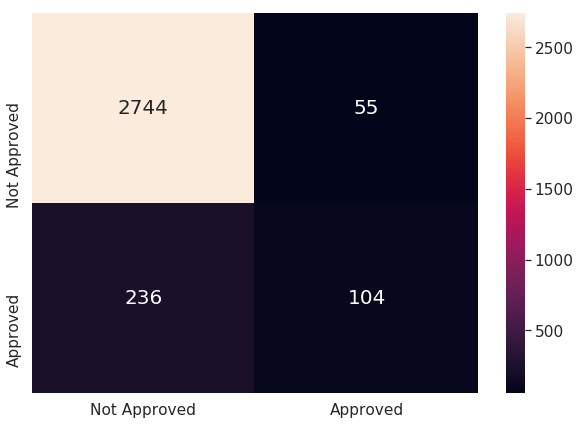

In [0]:
df_cm = pd.DataFrame(cm)
df_cm.index = ['Not Approved', 'Approved']
df_cm.columns = ['Not Approved', 'Approved']
names=['Not Approved', 'Approved']
print(df_cm)
fig = plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,fmt="d",annot_kws={"size": 20})# 

#Multinomial Logistic Regression

In [0]:
from pyspark.ml.classification import LogisticRegression
mlr = LogisticRegression(maxIter=10, regParam=0.3, elasticNetParam=0.8, family="multinomial")

In [0]:
from pyspark.ml import Pipeline

mlr_Pipeline = Pipeline(stages=preprocessiong_Stages+[mlr])

mlr_Pipeline_model = mlr_Pipeline.fit(trainingData)

In [0]:
train_predictions_mlr = mlr_Pipeline_model.transform(trainingData)
test_predictions_mlr = mlr_Pipeline_model.transform(testData)

In [0]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
predictionAndLabels_train_mlr = train_predictions_mlr.select("prediction", "label")
evaluator = MulticlassClassificationEvaluator(metricName="accuracy")
train_accuracy = evaluator.evaluate(predictionAndLabels_train_mlr)
print("Train set accuracy  = " + str(train_accuracy))
print("Train Error = %g" % (1.0 - train_accuracy))

predictionAndLabels_test_mlr = test_predictions_mlr.select("prediction", "label")
test_accuracy = evaluator.evaluate(predictionAndLabels_test_mlr)
print("Test set accuracy = " + str(test_accuracy))
print("Test Error = %g" % (1.0 - test_accuracy))

Train set accuracy  = 0.89168525008
Train Error = 0.108315
Test set accuracy = 0.869030390738
Test Error = 0.13097


In [0]:
true_positive = predictionAndLabels_train_mlr[(predictionAndLabels_train_mlr.label == 1) & (predictionAndLabels_train_mlr.prediction == 1.0)].count()
true_negative = predictionAndLabels_train_mlr[(predictionAndLabels_train_mlr.label == 0) & (predictionAndLabels_train_mlr.prediction == 0.0)].count()
false_positive = predictionAndLabels_train_mlr[(predictionAndLabels_train_mlr.label == 0) & (predictionAndLabels_train_mlr.prediction == 1.0)].count()
false_negative = predictionAndLabels_train_mlr[(predictionAndLabels_train_mlr.label == 1) & (predictionAndLabels_train_mlr.prediction == 0.0)].count()
print "TRAIN METRICS - LINEAR MODEL - MULTINOMIAL FAMILY"
print "True Positives:", true_positive
print "True Negatives:", true_negative
print "False Positives:", false_positive
print "False Negatives:", false_negative
print "Total", predictionAndLabels_train_mlr.count()
#precission = true_positive / float(true_positive + false_positive)
print "Precission: ", precission
recall = true_positive / float(true_positive + false_negative)
print "Recall: ", recall
print "F1 Score: ", (2*((precission * recall)/float(precission + recall)))
print("*****************************************************************************")
true_positive = predictionAndLabels_test_mlr[(predictionAndLabels_test_mlr.label == 1) & (predictionAndLabels_test_mlr.prediction == 1.0)].count()
true_negative = predictionAndLabels_test_mlr[(predictionAndLabels_test_mlr.label == 0) & (predictionAndLabels_test_mlr.prediction == 0.0)].count()
false_positive = predictionAndLabels_test_mlr[(predictionAndLabels_test_mlr.label == 0) & (predictionAndLabels_test_mlr.prediction == 1.0)].count()
false_negative = predictionAndLabels_test_mlr[(predictionAndLabels_test_mlr.label == 1) & (predictionAndLabels_test_mlr.prediction == 0.0)].count()
print "TEST METRICS - LINEAR MODEL - MULTINOMIAL FAMILY"
print "True Positives:", true_positive
print "True Negatives:", true_negative
print "False Positives:", false_positive
print "False Negatives:", false_negative
print "Total", predictionAndLabels_train_mlr.count()
#precission = true_positive / float(true_positive + false_positive)
print "Precission: ", precission
recall = true_positive / float(true_positive + false_negative)
print "Recall: ", recall
print "F1 Score: ", (2*((precission * recall)/float(precission + recall)))

TRAIN METRICS - LINEAR MODEL - MULTINOMIAL FAMILY
True Positives: 0
True Negatives: 2799
False Positives: 0
False Negatives: 340
Total 3139
Precission:  0.670886075949
Recall:  0.0
F1 Score:  0.0
*****************************************************************************
TEST METRICS - LINEAR MODEL - MULTINOMIAL FAMILY
True Positives: 0
True Negatives: 1201
False Positives: 0
False Negatives: 181
Total 3139
Precission:  0.670886075949
Recall:  0.0
F1 Score:  0.0


#Decision Tree Classifier

In [0]:
from pyspark.ml.classification import DecisionTreeClassifier
dt = DecisionTreeClassifier(labelCol="label", featuresCol="features")

In [0]:
dt_Pipeline = Pipeline(stages=preprocessiong_Stages+[dt]) 

dt_Pipeline_model = dt_Pipeline.fit(trainingData)

In [0]:
train_predictions_dt = dt_Pipeline_model.transform(trainingData)
test_predictions_dt = dt_Pipeline_model.transform(testData)

In [0]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
predictionAndLabels_train_dt = train_predictions_dt.select("prediction", "label")
evaluator = MulticlassClassificationEvaluator(metricName="accuracy")
train_accuracy = evaluator.evaluate(predictionAndLabels_train_dt)
print("Train set accuracy  = " + str(train_accuracy))
print("Train Error = %g" % (1.0 - train_accuracy))

predictionAndLabels_test_dt = test_predictions_dt.select("prediction", "label")
test_accuracy = evaluator.evaluate(predictionAndLabels_test_dt)
print("Test set accuracy = " + str(test_accuracy))
print("Test Error = %g" % (1.0 - test_accuracy))

Train set accuracy  = 0.908569608155
Train Error = 0.0914304
Test set accuracy = 0.877713458755
Test Error = 0.122287


In [0]:
true_positive = predictionAndLabels_train_dt[(predictionAndLabels_train_dt.label == 1) & (predictionAndLabels_train_dt.prediction == 1.0)].count()
true_negative = predictionAndLabels_train_dt[(predictionAndLabels_train_dt.label == 0) & (predictionAndLabels_train_dt.prediction == 0.0)].count()
false_positive = predictionAndLabels_train_dt[(predictionAndLabels_train_dt.label == 0) & (predictionAndLabels_train_dt.prediction == 1.0)].count()
false_negative = predictionAndLabels_train_dt[(predictionAndLabels_train_dt.label == 1) & (predictionAndLabels_train_dt.prediction == 0.0)].count()
print "TRAIN METRICS - DECISSION TREE CLASSIFIER"
print "True Positives:", true_positive
print "True Negatives:", true_negative
print "False Positives:", false_positive
print "False Negatives:", false_negative
print "Total", predictionAndLabels_train_dt.count()
precission = true_positive / float(true_positive + false_positive)
print "Precission: ", precission
recall = true_positive / float(true_positive + false_negative)
print "Recall: ", recall
print "F1 Score: ", (2*((precission * recall)/float(precission + recall)))
print("*****************************************************************************")
true_positive = predictionAndLabels_test_dt[(predictionAndLabels_test_dt.label == 1) & (predictionAndLabels_test_dt.prediction == 1.0)].count()
true_negative = predictionAndLabels_test_dt[(predictionAndLabels_test_dt.label == 0) & (predictionAndLabels_test_dt.prediction == 0.0)].count()
false_positive = predictionAndLabels_test_dt[(predictionAndLabels_test_dt.label == 0) & (predictionAndLabels_test_dt.prediction == 1.0)].count()
false_negative = predictionAndLabels_test_dt[(predictionAndLabels_test_dt.label == 1) & (predictionAndLabels_test_dt.prediction == 0.0)].count()
print "\n\nTEST METRICS - DECISSION TREE CLASSIFIER"
print "True Positives:", true_positive
print "True Negatives:", true_negative
print "False Positives:", false_positive
print "False Negatives:", false_negative
print "Total", predictionAndLabels_train_dt.count()
precission = true_positive / float(true_positive + false_positive)
print "Precission: ", precission
recall = true_positive / float(true_positive + false_negative)
print "Recall: ", recall
print "F1 Score: ", (2*((precission * recall)/float(precission + recall)))

TRAIN METRICS - DECISSION TREE CLASSIFIER
True Positives: 90
True Negatives: 2762
False Positives: 37
False Negatives: 250
Total 3139
Precission:  0.708661417323
Recall:  0.264705882353
F1 Score:  0.385438972163
*****************************************************************************


TEST METRICS - DECISSION TREE CLASSIFIER
True Positives: 36
True Negatives: 1177
False Positives: 24
False Negatives: 145
Total 3139
Precission:  0.6
Recall:  0.198895027624
F1 Score:  0.298755186722


In [0]:
treeModel = dt_Pipeline_model.stages[23]

In [0]:
print "Learned classification tree model:"
print treeModel.toDebugString

Learned classification tree model:
DecisionTreeClassificationModel (uid=DecisionTreeClassifier_4b03a6a5734667d9f184) of depth 5 with 53 nodes
  If (feature 2 <= 0.1780179445350734)
   If (feature 0 <= 0.6194029850746269)
    If (feature 65 in {1.0})
     If (feature 2 <= 0.06015497553017944)
      If (feature 1 <= 0.008074681888452848)
       Predict: 1.0
      Else (feature 1 > 0.008074681888452848)
       Predict: 0.0
     Else (feature 2 > 0.06015497553017944)
      If (feature 0 <= 0.17164179104477612)
       Predict: 0.0
      Else (feature 0 > 0.17164179104477612)
       Predict: 1.0
    Else (feature 65 not in {1.0})
     If (feature 4 <= 0.07282110091743119)
      If (feature 61 in {1.0})
       Predict: 0.0
      Else (feature 61 not in {1.0})
       Predict: 0.0
     Else (feature 4 > 0.07282110091743119)
      If (feature 2 <= 0.09645187601957586)
       Predict: 0.0
      Else (feature 2 > 0.09645187601957586)
       Predict: 0.0
   Else (feature 0 > 0.6194029850746269)
   

#RandomForest Classifier

In [0]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
predictionAndLabels_train_rf = train_predictions_rf.select("prediction", "label")
evaluator = MulticlassClassificationEvaluator(metricName="accuracy")
train_accuracy = evaluator.evaluate(predictionAndLabels_train_rf)
print("Train set accuracy  = " + str(train_accuracy))
print("Train Error = %g" % (1.0 - train_accuracy))

predictionAndLabels_test_rf = test_predictions_rf.select("prediction", "label")
test_accuracy = evaluator.evaluate(predictionAndLabels_test_rf)
print("Test set accuracy = " + str(test_accuracy))
print("Test Error = %g" % (1.0 - test_accuracy))

Train set accuracy  = 0.892322395667
Train Error = 0.107678
Test set accuracy = 0.868306801737
Test Error = 0.131693


In [0]:
true_positive = predictionAndLabels_train_rf[(predictionAndLabels_train_rf.label == 1) & (predictionAndLabels_train_rf.prediction == 1.0)].count()
true_negative = predictionAndLabels_train_rf[(predictionAndLabels_train_rf.label == 0) & (predictionAndLabels_train_rf.prediction == 0.0)].count()
false_positive = predictionAndLabels_train_rf[(predictionAndLabels_train_rf.label == 0) & (predictionAndLabels_train_rf.prediction == 1.0)].count()
false_negative = predictionAndLabels_train_rf[(predictionAndLabels_train_rf.label == 1) & (predictionAndLabels_train_rf.prediction == 0.0)].count()
print "TRAIN METRICS - RANDOM FOREST CLASSIFIER"
print "True Positives:", true_positive
print "True Negatives:", true_negative
print "False Positives:", false_positive
print "False Negatives:", false_negative
print "Total", predictionAndLabels_train_rf.count()
precission = true_positive / float(true_positive + false_positive)
print "Precission: ", precission
recall = true_positive / float(true_positive + false_negative)
print "Recall: ", recall
print "F1 Score: ", (2*((precission * recall)/float(precission + recall)))
print("*****************************************************************************")

true_positive = predictionAndLabels_test_rf[(predictionAndLabels_test_rf.label == 1) & (predictionAndLabels_test_rf.prediction == 1.0)].count()
true_negative = predictionAndLabels_test_rf[(predictionAndLabels_test_rf.label == 0) & (predictionAndLabels_test_rf.prediction == 0.0)].count()
false_positive = predictionAndLabels_test_rf[(predictionAndLabels_test_rf.label == 0) & (predictionAndLabels_test_rf.prediction == 1.0)].count()
false_negative = predictionAndLabels_test_rf[(predictionAndLabels_test_rf.label == 1) & (predictionAndLabels_test_rf.prediction == 0.0)].count()
print "TEST METRICS - RANDOM FOREST CLASSIFIER"
print "True Positives:", true_positive
print "True Negatives:", true_negative
print "False Positives:", false_positive
print "False Negatives:", false_negative
print "Total", predictionAndLabels_train_rf.count()
#precission = true_positive / float(true_positive + false_positive)
print "Precission: ", precission
recall = true_positive / float(true_positive + false_negative)
print "Recall: ", recall
print "F1 Score: ", (2*((precission * recall)/float(precission + recall)))

TRAIN METRICS - RANDOM FOREST CLASSIFIER
True Positives: 2
True Negatives: 2799
False Positives: 0
False Negatives: 338
Total 3139
Precission:  1.0
Recall:  0.00588235294118
F1 Score:  0.0116959064327
*****************************************************************************
TEST METRICS - RANDOM FOREST CLASSIFIER
True Positives: 0
True Negatives: 1200
False Positives: 1
False Negatives: 181
Total 3139
Precission:  1.0
Recall:  0.0
F1 Score:  0.0


#GradientBoostingTree Classifier

In [0]:
from pyspark.ml.classification import GBTClassifier
gbt = GBTClassifier(labelCol="label", featuresCol="features", maxIter=10)

In [0]:
gbt_Pipeline = Pipeline(stages=preprocessiong_Stages+[gbt]) 
gbt_Pipeline_model = gbt_Pipeline.fit(trainingData)

In [0]:
train_predictions_gbt = gbt_Pipeline_model.transform(trainingData)
test_predictions_gbt = gbt_Pipeline_model.transform(testData)

In [0]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
predictionAndLabels_train_gbt = train_predictions_gbt.select("prediction", "label")
evaluator = MulticlassClassificationEvaluator(metricName="accuracy")
train_accuracy = evaluator.evaluate(predictionAndLabels_train_gbt)
print("Train set accuracy  = " + str(train_accuracy))
print("Train Error = %g" % (1.0 - train_accuracy))

predictionAndLabels_test_gbt = test_predictions_gbt.select("prediction", "label")
test_accuracy = evaluator.evaluate(predictionAndLabels_test_gbt)
print("Test set accuracy = " + str(test_accuracy))
print("Test Error = %g" % (1.0 - test_accuracy))

Train set accuracy  = 0.933099713284
Train Error = 0.0669003
Test set accuracy = 0.89001447178
Test Error = 0.109986


In [0]:
true_positive = predictionAndLabels_train_gbt[(predictionAndLabels_train_gbt.label == 1) & (predictionAndLabels_train_gbt.prediction == 1.0)].count()
true_negative = predictionAndLabels_train_gbt[(predictionAndLabels_train_gbt.label == 0) & (predictionAndLabels_train_gbt.prediction == 0.0)].count()
false_positive = predictionAndLabels_train_gbt[(predictionAndLabels_train_gbt.label == 0) & (predictionAndLabels_train_gbt.prediction == 1.0)].count()
false_negative = predictionAndLabels_train_gbt[(predictionAndLabels_train_gbt.label == 1) & (predictionAndLabels_train_gbt.prediction == 0.0)].count()
print "TRAIN METRICS - GRADIENT-BOOSTED TREE CLASSIFIER"
print "True Positives:", true_positive
print "True Negatives:", true_negative
print "False Positives:", false_positive
print "False Negatives:", false_negative
print "Total", predictionAndLabels_train_gbt.count()
precission = true_positive / float(true_positive + false_positive)
print "Precission: ", precission
recall = true_positive / float(true_positive + false_negative)
print "Recall: ", recall
print "F1 Score: ", (2*((precission * recall)/float(precission + recall)))
print("*****************************************************************************")
true_positive = predictionAndLabels_test_gbt[(predictionAndLabels_test_gbt.label == 1) & (predictionAndLabels_test_gbt.prediction == 1.0)].count()
true_negative = predictionAndLabels_test_gbt[(predictionAndLabels_test_gbt.label == 0) & (predictionAndLabels_test_gbt.prediction == 0.0)].count()
false_positive = predictionAndLabels_test_gbt[(predictionAndLabels_test_gbt.label == 0) & (predictionAndLabels_test_gbt.prediction == 1.0)].count()
false_negative = predictionAndLabels_test_gbt[(predictionAndLabels_test_gbt.label == 1) & (predictionAndLabels_test_gbt.prediction == 0.0)].count()
print "TEST METRICS - GRADIENT-BOOSTED TREE CLASSIFIER"
print "True Positives:", true_positive
print "True Negatives:", true_negative
print "False Positives:", false_positive
print "False Negatives:", false_negative
print "Total", predictionAndLabels_train_gbt.count()
precission = true_positive / float(true_positive + false_positive)
print "Precission: ", precission
recall = true_positive / float(true_positive + false_negative)
print "Recall: ", recall
print "F1 Score: ", (2*((precission * recall)/float(precission + recall)))

TRAIN METRICS - GRADIENT-BOOSTED TREE CLASSIFIER
True Positives: 162
True Negatives: 2767
False Positives: 32
False Negatives: 178
Total 3139
Precission:  0.835051546392
Recall:  0.476470588235
F1 Score:  0.606741573034
*****************************************************************************
TEST METRICS - GRADIENT-BOOSTED TREE CLASSIFIER
True Positives: 54
True Negatives: 1176
False Positives: 25
False Negatives: 127
Total 3139
Precission:  0.683544303797
Recall:  0.298342541436
F1 Score:  0.415384615385


# Mutilayer Perceptron Classifier

In [0]:
from pyspark.ml.classification import MultilayerPerceptronClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# specify layers for the neural network:
# input layer of size 71 (features), two intermediate of size 50 and 40
# and output of size 2 (classes)
layers = [70, 50, 40, 2]
# create the trainer and set its parameters
mlp = MultilayerPerceptronClassifier(maxIter=100, layers=layers, 
                                     blockSize=128, seed=1234)

In [0]:
mlp_Pipeline = Pipeline(stages=preprocessiong_Stages+[mlp]) 
mlp_Pipeline_model = mlp_Pipeline.fit(trainingData)

In [0]:
train_predictions_mlp = mlp_Pipeline_model.transform(trainingData)
test_predictions_mlp = mlp_Pipeline_model.transform(testData)

In [0]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
predictionAndLabels_train_mlp = train_predictions_mlp.select("prediction", "label")
evaluator = MulticlassClassificationEvaluator(metricName="accuracy")
train_accuracy = evaluator.evaluate(predictionAndLabels_train_mlp)
print("Train set accuracy  = " + str(train_accuracy))
print("Train Error = %g" % (1.0 - train_accuracy))

predictionAndLabels_test_mlp = test_predictions_mlp.select("prediction", "label")
test_accuracy = evaluator.evaluate(predictionAndLabels_test_mlp)
print("Test set accuracy = " + str(test_accuracy))
print("Test Error = %g" % (1.0 - test_accuracy))

Train set accuracy  = 0.948391207391
Train Error = 0.0516088
Test set accuracy = 0.87988422576
Test Error = 0.120116


In [0]:
true_positive = predictionAndLabels_train_mlp[(predictionAndLabels_train_mlp.label == 1) & (predictionAndLabels_train_mlp.prediction == 1.0)].count()
true_negative = predictionAndLabels_train_mlp[(predictionAndLabels_train_mlp.label == 0) & (predictionAndLabels_train_mlp.prediction == 0.0)].count()
false_positive = predictionAndLabels_train_mlp[(predictionAndLabels_train_mlp.label == 0) & (predictionAndLabels_train_mlp.prediction == 1.0)].count()
false_negative = predictionAndLabels_train_mlp[(predictionAndLabels_train_mlp.label == 1) & (predictionAndLabels_train_mlp.prediction == 0.0)].count()
print "TRAIN METRICS - MULTI-LAYER PERCEPTRON CLASSIFIER"
print "True Positives:", true_positive
print "True Negatives:", true_negative
print "False Positives:", false_positive
print "False Negatives:", false_negative
print "Total", predictionAndLabels_train_mlp.count()
precission = true_positive / float(true_positive + false_positive + 1)
print "Precission: ", precission
recall = true_positive / float(true_positive + false_negative)
print "Recall: ", recall
print "F1 Score: ", (2*((precission * recall)/float(precission + recall+1)))
print("*****************************************************************************")
true_positive = predictionAndLabels_test_mlp[(predictionAndLabels_test_mlp.label == 1) & (predictionAndLabels_test_mlp.prediction == 1.0)].count()
true_negative = predictionAndLabels_test_mlp[(predictionAndLabels_test_mlp.label == 0) & (predictionAndLabels_test_mlp.prediction == 0.0)].count()
false_positive = predictionAndLabels_test_mlp[(predictionAndLabels_test_mlp.label == 0) & (predictionAndLabels_test_mlp.prediction == 1.0)].count()
false_negative = predictionAndLabels_test_mlp[(predictionAndLabels_test_mlp.label == 1) & (predictionAndLabels_test_mlp.prediction == 0.0)].count()
print "TEST METRICS - MULTI-LAYER PERCEPTRON CLASSIFIER"
print "True Positives:", true_positive
print "True Negatives:", true_negative
print "False Positives:", false_positive
print "False Negatives:", false_negative
print "Total", predictionAndLabels_train_mlp.count()
precission = true_positive / (float(true_positive + false_positive) + 1)
print "Precission: ", precission
recall = true_positive / float(true_positive + false_negative)
print "Recall: ", recall
print "F1 Score: ", (2*((precission * recall)/float(precission + recall+1)))

TRAIN METRICS - MULTI-LAYER PERCEPTRON CLASSIFIER
True Positives: 238
True Negatives: 2739
False Positives: 60
False Negatives: 102
Total 3139
Precission:  0.795986622074
Recall:  0.7
F1 Score:  0.446469248292
*****************************************************************************
TEST METRICS - MULTI-LAYER PERCEPTRON CLASSIFIER
True Positives: 82
True Negatives: 1134
False Positives: 67
False Negatives: 99
Total 3139
Precission:  0.546666666667
Recall:  0.453038674033
F1 Score:  0.247697635011


# Linear SVM Classifier

In [0]:
from pyspark.ml.classification import LinearSVC
lsvc = LinearSVC(maxIter=10, regParam=0.1)

In [0]:
lsvc_Pipeline = Pipeline(stages=preprocessiong_Stages+[lsvc]) 
lsvc_Pipeline_model = lsvc_Pipeline.fit(trainingData)

In [0]:
train_predictions_lsvc = lsvc_Pipeline_model.transform(trainingData)
test_predictions_lsvc = lsvc_Pipeline_model.transform(testData)

In [0]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
predictionAndLabels_train_lsvc = train_predictions_lsvc.select("prediction", "label")
evaluator = MulticlassClassificationEvaluator(metricName="accuracy")
train_accuracy = evaluator.evaluate(predictionAndLabels_train_lsvc)
print("Train set accuracy  = " + str(train_accuracy))
print("Train Error = %g" % (1.0 - train_accuracy))

predictionAndLabels_test_lsvc = test_predictions_lsvc.select("prediction", "label")
test_accuracy = evaluator.evaluate(predictionAndLabels_test_lsvc)
print("Test set accuracy = " + str(test_accuracy))
print("Test Error = %g" % (1.0 - test_accuracy))

Train set accuracy  = 0.89168525008
Train Error = 0.108315
Test set accuracy = 0.869030390738
Test Error = 0.13097


In [0]:
true_positive = predictionAndLabels_train_lsvc[(predictionAndLabels_train_lsvc.label == 1) & (predictionAndLabels_train_lsvc.prediction == 1.0)].count()
true_negative = predictionAndLabels_train_lsvc[(predictionAndLabels_train_lsvc.label == 0) & (predictionAndLabels_train_lsvc.prediction == 0.0)].count()
false_positive = predictionAndLabels_train_lsvc[(predictionAndLabels_train_lsvc.label == 0) & (predictionAndLabels_train_lsvc.prediction == 1.0)].count()
false_negative = predictionAndLabels_train_lsvc[(predictionAndLabels_train_lsvc.label == 1) & (predictionAndLabels_train_lsvc.prediction == 0.0)].count()
print "TRAIN METRICS - Linear Support Vector Machine CLASSIFIER"
print "True Positives:", true_positive
print "True Negatives:", true_negative
print "False Positives:", false_positive
print "False Negatives:", false_negative
print "Total", predictionAndLabels_train_lsvc.count()
precission = true_positive / float(true_positive + false_positive+1)
print "Precission: ", precission
recall = true_positive / float(true_positive + false_negative)
print "Recall: ", recall
print "F1 Score: ", (2*((precission * recall)/float(precission + recall+1)))
print("*****************************************************************************")
true_positive = predictionAndLabels_test_lsvc[(predictionAndLabels_test_lsvc.label == 1) & (predictionAndLabels_test_lsvc.prediction == 1.0)].count()
true_negative = predictionAndLabels_test_lsvc[(predictionAndLabels_test_lsvc.label == 0) & (predictionAndLabels_test_lsvc.prediction == 0.0)].count()
false_positive = predictionAndLabels_test_lsvc[(predictionAndLabels_test_lsvc.label == 0) & (predictionAndLabels_test_lsvc.prediction == 1.0)].count()
false_negative = predictionAndLabels_test_lsvc[(predictionAndLabels_test_lsvc.label == 1) & (predictionAndLabels_test_lsvc.prediction == 0.0)].count()
print "TEST METRICS - Linear Support Vector Machine CLASSIFIER"
print "True Positives:", true_positive
print "True Negatives:", true_negative
print "False Positives:", false_positive
print "False Negatives:", false_negative
print "Total", predictionAndLabels_train_lsvc.count()
precission = true_positive / float(true_positive + false_positive+1)
print "Precission: ", precission
recall = true_positive / float(true_positive + false_negative)
print "Recall: ", recall
print "F1 Score: ", (2*((precission * recall)/float(precission + recall+1)))

TRAIN METRICS - Linear Support Vector Machine CLASSIFIER
True Positives: 0
True Negatives: 2799
False Positives: 0
False Negatives: 340
Total 3139
Precission:  0.0
Recall:  0.0
F1 Score:  0.0
*****************************************************************************
TEST METRICS - Linear Support Vector Machine CLASSIFIER
True Positives: 0
True Negatives: 1201
False Positives: 0
False Negatives: 181
Total 3139
Precission:  0.0
Recall:  0.0
F1 Score:  0.0


# NaiveBayes Classifier

In [0]:
from pyspark.ml.classification import NaiveBayes
nbc = NaiveBayes(smoothing=1.0, modelType="multinomial")

In [0]:
nbc_Pipeline = Pipeline(stages=preprocessiong_Stages+[nbc]) 
nbc_Pipeline_model = nbc_Pipeline.fit(trainingData)

In [0]:
train_predictions_nbc = nbc_Pipeline_model.transform(trainingData)
test_predictions_nbc = nbc_Pipeline_model.transform(testData)

In [0]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
predictionAndLabels_train_nbc = train_predictions_nbc.select("prediction", "label")
evaluator = MulticlassClassificationEvaluator(metricName="accuracy")
train_accuracy = evaluator.evaluate(predictionAndLabels_train_nbc)
print("Train set accuracy  = " + str(train_accuracy))
print("Train Error = %g" % (1.0 - train_accuracy))

predictionAndLabels_test_nbc = test_predictions_nbc.select("prediction", "label")
test_accuracy = evaluator.evaluate(predictionAndLabels_test_nbc)
print("Test set accuracy = " + str(test_accuracy))
print("Test Error = %g" % (1.0 - test_accuracy))

Train set accuracy  = 0.887862376553
Train Error = 0.112138
Test set accuracy = 0.866136034732
Test Error = 0.133864


In [0]:
true_negative = predictionAndLabels_train_nbc[(predictionAndLabels_train_nbc.label == 0) & (predictionAndLabels_train_nbc.prediction == 0.0)].count()
true_positive = predictionAndLabels_train_nbc[(predictionAndLabels_train_nbc.label == 1) & (predictionAndLabels_train_nbc.prediction == 1.0)].count()
false_positive = predictionAndLabels_train_nbc[(predictionAndLabels_train_nbc.label == 0) & (predictionAndLabels_train_nbc.prediction == 1.0)].count()
false_negative = predictionAndLabels_train_nbc[(predictionAndLabels_train_nbc.label == 1) & (predictionAndLabels_train_nbc.prediction == 0.0)].count()
print "TRAIN METRICS - Naive Bayes CLASSIFIER"
print "True Positives:", true_positive
print "True Negatives:", true_negative
print "False Positives:", false_positive
print "False Negatives:", false_negative
print "Total", predictionAndLabels_train_nbc.count()
precision = true_positive / float(true_positive + false_positive)
print "Precision: ", precision
recall = true_positive / float(true_positive + false_negative)
print "Recall: ", recall
print "F1 Score: ", (2*((precission * recall)/float(precission + recall)))
print("*****************************************************************************")
true_positive = predictionAndLabels_test_nbc[(predictionAndLabels_test_nbc.label == 1) & (predictionAndLabels_test_nbc.prediction == 1.0)].count()
true_negative = predictionAndLabels_test_nbc[(predictionAndLabels_test_nbc.label == 0) & (predictionAndLabels_test_nbc.prediction == 0.0)].count()
false_positive = predictionAndLabels_test_nbc[(predictionAndLabels_test_nbc.label == 0) & (predictionAndLabels_test_nbc.prediction == 1.0)].count()
false_negative = predictionAndLabels_test_nbc[(predictionAndLabels_test_nbc.label == 1) & (predictionAndLabels_test_nbc.prediction == 0.0)].count()
print "TEST METRICS - Naive Bayes CLASSIFIER"
print "True Positives:", true_positive
print "True Negatives:", true_negative
print "False Positives:", false_positive
print "False Negatives:", false_negative
print "Total", predictionAndLabels_train_nbc.count()
precision = true_positive / float(true_positive + false_positive)
print "Precision: ", precision
recall = true_positive / float(true_positive + false_negative)
print "Recall: ", recall
print "F1 Score: ", (2*((precission * recall)/float(precission + recall)))

TRAIN METRICS - Naive Bayes CLASSIFIER
True Positives: 47
True Negatives: 2740
False Positives: 59
False Negatives: 293
Total 3139
Precision:  0.443396226415
Recall:  0.138235294118
F1 Score:  0.0
*****************************************************************************
TEST METRICS - Naive Bayes CLASSIFIER
True Positives: 17
True Negatives: 1180
False Positives: 21
False Negatives: 164
Total 3139
Precision:  0.447368421053
Recall:  0.0939226519337
F1 Score:  0.0
